In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math


# convert points from euclidian to homogeneous
def to_homog(points): #here always remember that points is a 3x4 matrix
    # write your code here
    if len(points.shape)==1:
        # only 1 point is passed:
        a=np.ones((len(points)+1),np.float32)
        a[0]=points[0]
        a[1]=points[1]
        return a
    r,c=(points.shape[0]+1,points.shape[1])
    a=np.ones((r,c),type(points[0,0]))
    a[:r-1,:]=points[:,:]
    return a


# convert points from homogeneous to euclidian
def from_homog(points_homog):
    # write your code here
    if len(points_homog.shape)==1:
        # only 1 point is passed:
        a=np.zeros((len(points_homog)-1),np.float32)
        a[0]=points_homog[0]/points_homog[2]
        a[1]=points_homog[1]/points_homog[2]
        return a
    n=points_homog.shape[0]-1
    m=points_homog.shape[1]
    b=np.zeros((n,m),np.float32)
    for i in range(n):
        b[i,:]=points_homog[i,:]/points_homog[n,:]
    
    return b


# project 3D euclidian points to 2D euclidian
def project_points(P_int, P_ext, pts):
    # write your code here
    # assuming P_int is the camera matrix (3x4)
    # P_ext is 4x4
    # pts are 3x1 (non homogenous)
#     print(np.shape(P_int))
#     print(np.shape(P_ext))
#     print(np.shape(to_homog(pts)))
    pts_final=np.matmul(P_int,np.matmul(P_ext,to_homog(pts)))
    return from_homog(pts_final)

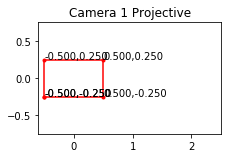

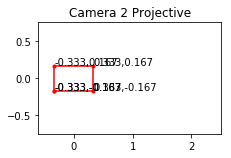

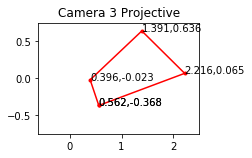

In [5]:
# Change the three matrices for the four cases as described in the problem
# in the four camera functions geiven below. Make sure that we can see the formula
# (if one exists) being used to fill in the matrices. Feel free to document with
# comments any thing you feel the need to explain. 

def camera1():
    # write your code here
#     [No rigid body transformation]. Focal length = 1. The optical axis of the camera is aligned with the z-axis.
    P_ext=np.asarray([[1,0,0,0],
                      [0,1,0,0],
                      [0,0,1,0],
                      [0,0,0,1]]).astype(np.float32)
    P_int_proj=np.asarray([[1,0,0,0],
                           [0,1,0,0],
                           [0,0,1,0]]).astype(np.float32)
    return P_int_proj, P_ext

def camera2():
    # write your code here
#     [Translation].  𝐵𝑂𝐴=[0 0 1]𝑇 . Focal length = 1. The optical axis of the camera is aligned with the z-axis.
    P_ext=np.asarray([[1,0,0,0],
                      [0,1,0,0],
                      [0,0,1,1],
                      [0,0,0,1]]).astype(np.float32)
    P_int_proj=np.asarray([[1,0,0,0],
                           [0,1,0,0],
                           [0,0,1,0]]).astype(np.float32)
    return P_int_proj, P_ext

def camera3():
    # write your code here
# [Translation and Rotation]. Focal length = 1.  
# 𝐵𝐴𝑅  encodes a 30 degrees around the z-axis and then 60 degrees around the y-axis.  
# 𝐵𝑂𝐴=[0 0 1]𝑇 .
    thetay=np.pi*2*60.0/360.0
    thetaz=30.0*(np.pi/180.0)
    ry=np.asarray([[np.cos(thetay),0,np.sin(thetay)],
                   [0,1,0],
                   [-1*np.sin(thetay),0,np.cos(thetay)]]).astype(np.float32)
    rz=np.asarray([[np.cos(thetaz),-1*np.sin(thetaz),0],
                   [np.sin(thetaz),np.cos(thetaz),0],
                   [0,0,1]]).astype(np.float32)
    R=np.dot(ry,rz)
    P_ext=np.zeros((4,4),np.float32)
    P_ext[:3,:3]=R[:,:]
    P_ext[2,3]=1
    P_ext[3,3]=1
    P_int_proj=np.asarray([[1,0,0,0],
                           [0,1,0,0],
                           [0,0,1,0]]).astype(np.float32)
    return P_int_proj, P_ext

def camera4():    
    # write your code here
#     [Translation and Rotation, long distance]. Focal length = 5.  
# 𝐵𝐴𝑅  encodes a 30 degrees around the z-axis and then 60 degrees around the y-axis.  𝐵𝑂𝐴=[0 0 13]𝑇 .

    thetay=np.pi*2*60.0/360.0
    thetaz=30.0*(np.pi/180.0)
    ry=np.asarray([[np.cos(thetay),0,np.sin(thetay)],
                   [0,1,0],
                   [-1*np.sin(thetay),0,np.cos(thetay)]]).astype(np.float32)
    rz=np.asarray([[np.cos(thetaz),-1*np.sin(thetaz),0],
                   [np.sin(thetaz),np.cos(thetaz),0],
                   [0,0,1]]).astype(np.float32)
    R=np.dot(ry,rz)
    P_ext=np.zeros((4,4),np.float32)
    P_ext[:3,:3]=R[:,:]
    P_ext[2,3]=13
    P_ext[3,3]=1
    P_int_proj=np.asarray([[1,0,0,0],
                           [0,1,0,0],
                           [0,0,0.2,0]]).astype(np.float32)
    return P_int_proj, P_ext

# Use the following code to display your outputs
# You are free to change the axis parameters to better 
# display your quadrilateral but do not remove any annotations

def plot_points(points, title='', style='.-r', axis=[]):
    inds = list(range(points.shape[1]))+[0]
    plt.plot(points[0,inds], points[1,inds],style)
    
    for i in range(len(points[0,inds])):
#         print(type(points[0,inds][i]))
#         print(np.shape(points[0,inds][i]))
        plt.annotate(str("{0:.3f}".format(points[0,inds][i]))+","+str("{0:.3f}".format(points[1,inds][i])),(points[0,inds][i], points[1,inds][i]))
    
    if title:
        plt.title(title)
    if axis:
        plt.axis(axis)
        
    plt.tight_layout()
        
def main():
    point1 = np.array([[-1,-.5,2]]).T
    point2 = np.array([[1,-.5,2]]).T
    point3 = np.array([[1,.5,2]]).T
    point4 = np.array([[-1,.5,2]]).T 
    points = np.hstack((point1,point2,point3,point4))
    
    for i, camera in enumerate([camera1, camera2, camera3, camera4]):
        P_int_proj, P_ext = camera()
        plt.subplot(2, 2, i+1)
        pts=project_points(P_int_proj, P_ext, points)
#         print(pts)
#         print(pts.shape)
#         print(type(pts[0,0]))
        plot_points(pts, title='Camera %d Projective'%(i+1), axis=[-0.6,2.5,-0.75,0.75])
        plt.show()

main()

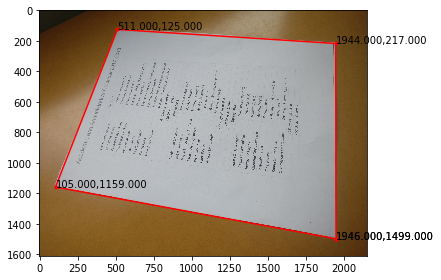

(1611, 2148, 3)
[0.11372549 0.10588235 0.05882353]


In [7]:
import numpy as np
from PIL import Image


import matplotlib.pyplot as plt

# load image to be used - resize to make sure it's not too large
# You can use the given image as well
# A large image will make testing you code take longer; once you're satisfied with your result,
# you can, if you wish to, make the image larger (or till your computer memory allows you to)

source_image = np.array(Image.open("photo.jpg"))/255
# logo_image= plt.imread("ucsd_logo.png")
# display images
plt.imshow(source_image)

# Align the polygon such that the corners align with the document in your picture
# This polygon doesn't need to overlap with the edges perfectly, an approximation is fine
# The order of points is clockwise, starting from bottom left.
x_coords = [1946,105,511,1944] 
y_coords = [1499,1159,125,217]

# Plot points from the previous problem is used to draw over your image 
# Note that your coordinates will change once you resize your image again
source_points = np.vstack((x_coords, y_coords))
plot_points(source_points)

plt.show()
# plt.imshow(logo_image)
# plt.show()
# print(logo_image.shape)
print (source_image.shape)
print(source_image[0,0])

In [21]:
from PIL import Image

png = Image.open("ucsd_logo.png")
png.load() # required for png.split()

background = Image.new("RGB", png.size, (255, 255, 255))
background.paste(png, mask=png.split()[3]) # 3 is the alpha channel
logo_image=np.asarray(background)/255.0
plt.imshow(logo_image)
print(logo_image.shape)

(200, 200, 3)


In [8]:
def computeH(source_points, target_points):
    # returns the 3x3 homography matrix such that:
    # np.matmul(H, source_points) = target_points
    # where source_points and target_points are expected to be in homogeneous
    # make sure points are 3D homogeneous
    assert source_points.shape[0]==3 and target_points.shape[0]==3
    #Your code goes here
    H_mtx = np.zeros((3,3)) #Fill in the H_mtx with appropriate values.
    #source to e -> H1, e to target -> H2_inv
    # will calculate H1, and H2. Then do H1.H2^-1
    # H1
    xin=source_points.T
    print("XIN",xin)
    xinmat=np.hstack((xin[0,:].reshape(-1,1),xin[1,:].reshape(-1,1),xin[2,:].reshape(-1,1)))
    print("XINMAT",xinmat)
    lambdas1=np.matmul(np.linalg.inv(xinmat),xin[3,:].reshape(-1,1)).reshape(-1)

    print("LAMBDAS1",lambdas1)
    H1inv=np.hstack((xin[0,:].reshape(-1,1)*lambdas1[0],
                     xin[1,:].reshape(-1,1)*lambdas1[1],
                     xin[2,:].reshape(-1,1)*lambdas1[2]))
    print("H1inv",H1inv)
    xout=target_points.T
    print("XOUT",xout)
    xoutmat=np.hstack((xout[0,:].reshape(-1,1),xout[1,:].reshape(-1,1),xout[2,:].reshape(-1,1)))
    print("XOUTMAT",xoutmat)
    lambdas2=np.matmul(np.linalg.inv(xoutmat),xout[3,:].reshape(-1,1)).reshape(-1)
    print("LAMBDAS2",lambdas2)
    H2inv=np.hstack((xout[0,:].reshape(-1,1)*lambdas2[0],
                    xout[1,:].reshape(-1,1)*lambdas2[1],
                    xout[2,:].reshape(-1,1)*lambdas2[2]))
    print("H2inv",H2inv)
    H_mtx=np.matmul(H2inv,np.linalg.inv(H1inv))
    print("***********")
    return  H_mtx
#######################################################
# test code. Do not modify
#######################################################
def test_computeH():
    source_points = np.array([[0,0.5],[1,0.5],[1,1.5],[0,1.5]]).T
    target_points = np.array([[0,0],[1,0],[2,1],[-1,1]]).T
    H = computeH(to_homog(source_points), to_homog(target_points))
    mapped_points = from_homog(np.matmul(H,to_homog(source_points)))
    print (from_homog(np.matmul(H,to_homog(source_points[:,1].reshape(2,1)))))
    
    print(target_points)
    print(mapped_points)
    plot_points(source_points,style='.-k')
    plot_points(target_points,style='*-b')
    plot_points(mapped_points,style='.:r')
    plt.show()
    print('The red and blue quadrilaterals should overlap if ComputeH is implemented correctly.')
test_computeH()

XIN [[0.  0.5 1. ]
 [1.  0.5 1. ]
 [1.  1.5 1. ]
 [0.  1.5 1. ]]
XINMAT [[0.  1.  1. ]
 [0.5 0.5 1.5]
 [1.  1.  1. ]]
LAMBDAS1 [ 1. -1.  1.]
H1inv [[ 0.  -1.   1. ]
 [ 0.5 -0.5  1.5]
 [ 1.  -1.   1. ]]
XOUT [[ 0  0  1]
 [ 1  0  1]
 [ 2  1  1]
 [-1  1  1]]
XOUTMAT [[0 1 2]
 [0 0 1]
 [1 1 1]]
LAMBDAS2 [ 3. -3.  1.]
H2inv [[ 0. -3.  2.]
 [ 0. -0.  1.]
 [ 3. -3.  1.]]
***********
[[1.]
 [0.]]
[[ 0  1  2 -1]
 [ 0  0  1  1]]
[[ 0.  1.  2. -1.]
 [ 0.  0.  1.  1.]]


The red and blue quadrilaterals should overlap if ComputeH is implemented correctly.


In [30]:
def warp(source_img, source_points, target_size):
    # Create a target image and select target points to create a homography from source image to target image,
    # in other words map all source points to target points and then create
    # a warped version of the image based on the homography by filling in the target image.
    # Make sure the new image (of size target_size) has the same number of color channels as source image
    assert target_size[2]==source_img.shape[2]
    #Your code goes here
    h=target_size[0]-1#nrows (max for i)
    w=target_size[1]-1#ncols (max for j)
    print("h,w:",h,w)
    target_points_xy=np.asarray([[0,h],[0.0,0.0],[w,0],[w,h]]).T
    target_img=np.zeros(target_size)
    for pts in target_points_xy.T:
        print(pts,target_img[int(pts[1]),int(pts[0])])

    print("Source Points coordinates:",source_points)
    print("Target Points coordinates:",target_points_xy)
    H=computeH(to_homog(source_points),to_homog(target_points_xy))
    for pts in source_points.T:
        homogpts=to_homog(pts)
        print("Source Point coordinates:",pts)
        outpts=from_homog(np.matmul(H,homogpts))
        print("Corresponding Output point coordinates",(int(outpts[0]),int(outpts[1])))
    for xin in range(source_img.shape[1]):
        for yin in range(source_img.shape[0]):
            inpts=to_homog(np.asarray([xin,yin]))
            
            (x,y)=from_homog(np.matmul(H,inpts))
            
            
            if x<0 or x>=target_img.shape[1] or y<0 or y>=target_img.shape[0]:
                continue
            target_img[int(y),int(x),:]=source_img[yin,xin,:]
    return target_img

# Use the code below to plot your result
# source_points=np.asarray([[105.0,115.0],[50.0,10.0],[195.0,19.0],[195.0,150.0]]).T.astype(np.float32)
# print("Source Points:",source_points)
# print(source_image.shape)
result = warp(source_image, source_points, (source_image.shape[1],source_image.shape[0],3)) #Choose appropriate target size

plt.subplot(1, 2, 1)
plt.imshow(source_image)
plt.subplot(1, 2, 2)
plt.imsave("myop3.png",result)
plt.imshow(result)
plt.show()

h,w: 2147 1610
[   0. 2147.] [0. 0. 0.]
[0. 0.] [0. 0. 0.]
[1610.    0.] [0. 0. 0.]
[1610. 2147.] [0. 0. 0.]
Source Points coordinates: [[1946  105  511 1944]
 [1499 1159  125  217]]
Target Points coordinates: [[   0.    0. 1610. 1610.]
 [2147.    0.    0. 2147.]]
XIN [[1946 1499    1]
 [ 105 1159    1]
 [ 511  125    1]
 [1944  217    1]]
XINMAT [[1946  105  511]
 [1499 1159  125]
 [   1    1    1]]
LAMBDAS1 [ 0.74404815 -0.89973129  1.15568314]
H1inv [[ 1.44791770e+03 -9.44717858e+01  5.90554087e+02]
 [ 1.11532818e+03 -1.04278857e+03  1.44460393e+02]
 [ 7.44048150e-01 -8.99731294e-01  1.15568314e+00]]
XOUT [[0.000e+00 2.147e+03 1.000e+00]
 [0.000e+00 0.000e+00 1.000e+00]
 [1.610e+03 0.000e+00 1.000e+00]
 [1.610e+03 2.147e+03 1.000e+00]]
XOUTMAT [[0.000e+00 0.000e+00 1.610e+03]
 [2.147e+03 0.000e+00 0.000e+00]
 [1.000e+00 1.000e+00 1.000e+00]]
LAMBDAS2 [ 1. -1.  1.]
H2inv [[ 0.000e+00 -0.000e+00  1.610e+03]
 [ 2.147e+03 -0.000e+00  0.000e+00]
 [ 1.000e+00 -1.000e+00  1.000e+00]]
*****

In [10]:
def distance(x1,y1,x2,y2,metric='l1'):
    if metric=='l1':
        return np.abs(x1-x2)+np.abs(y1-y2)
    if metric=='l2':
        return np.sqrt((x1-x2)**2+(y1-y2)**2)

def n_nearest_neighbours(x,y,n=8,dist='l2'):
    '''Takes a point in 2D space,
    returns n nearest neighbours (n<=15)
    '''
    nn=[]
    fracx=x%1.0
    fracy=y%1.0
    xfloor=np.floor(x)
    yfloor=np.floor(y)
    xceil=np.ceil(x)
    yceil=np.ceil(y)
    window_size=int(np.ceil(np.sqrt(n)))
    xns=set(range(int(xfloor)-int(window_size/2),int(xceil)+int(window_size/2)+1))
    yns=set(range(int(yfloor)-int(window_size/2),int(yceil)+int(window_size/2)+1))
#     xns=set([xfloor-2,xfloor-1,xfloor,xceil,xceil+1,xfloor+2])
#     yns=set([yfloor-1,yfloor,yceil,yceil+1])
        
    for xn in xns:
        for yn in yns:
            a=distance(x,y,xn,yn,metric='l2')
#             print(type(a))
#             print(type(xn))
#             print(type(yn))
            nn.append((a,xn,yn))
    nn=sorted(nn)
    return nn[:n]

In [15]:
def norm(img):
    maxi=img.max()
    mini=img.min()
    return (img-mini)/(maxi-mini)

h,w: 1073 804
[   0. 1073.] [0. 0. 0.]
[0. 0.] [0. 0. 0.]
[804.   0.] [0. 0. 0.]
[ 804. 1073.] [0. 0. 0.]
Source Points coordinates: [[1946  105  511 1944]
 [1499 1159  125  217]]
Target Points coordinates: [[   0.    0.  804.  804.]
 [1073.    0.    0. 1073.]]
XIN [[1946 1499    1]
 [ 105 1159    1]
 [ 511  125    1]
 [1944  217    1]]
XINMAT [[1946  105  511]
 [1499 1159  125]
 [   1    1    1]]
LAMBDAS1 [ 0.74404815 -0.89973129  1.15568314]
H1inv [[ 1.44791770e+03 -9.44717858e+01  5.90554087e+02]
 [ 1.11532818e+03 -1.04278857e+03  1.44460393e+02]
 [ 7.44048150e-01 -8.99731294e-01  1.15568314e+00]]
XOUT [[0.000e+00 1.073e+03 1.000e+00]
 [0.000e+00 0.000e+00 1.000e+00]
 [8.040e+02 0.000e+00 1.000e+00]
 [8.040e+02 1.073e+03 1.000e+00]]
XOUTMAT [[0.000e+00 0.000e+00 8.040e+02]
 [1.073e+03 0.000e+00 0.000e+00]
 [1.000e+00 1.000e+00 1.000e+00]]
LAMBDAS2 [ 1. -1.  1.]
H2inv [[ 0.000e+00 -0.000e+00  8.040e+02]
 [ 1.073e+03 -0.000e+00  0.000e+00]
 [ 1.000e+00 -1.000e+00  1.000e+00]]
********

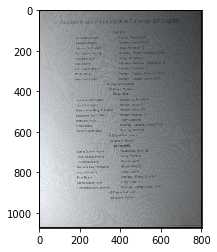

In [16]:
def forward_mapping_with_nearest_nbrs(source_img, source_points, target_size):
    # Create a target image and select target points to create a homography from source image to target image,
    # in other words map all source points to target points and then create
    # a warped version of the image based on the homography by filling in the target image.
    # Make sure the new image (of size target_size) has the same number of color channels as source image
    assert target_size[2]==source_img.shape[2]
    #Your code goes here
    target_size=(int(target_size[0]/2),int(target_size[1]/2),target_size[2])
#     target_size[1]/=2.0
    h=target_size[0]-1#nrows (max for i)
    w=target_size[1]-1#ncols (max for j)
    print("h,w:",h,w)
    target_points_xy=np.asarray([[0,h],[0.0,0.0],[w,0],[w,h]]).T
    target_img=np.zeros(target_size)
    secondary_buffer=np.zeros(target_size[:2])
    for pts in target_points_xy.T:
        print(pts,target_img[int(pts[1]),int(pts[0])])

    print("Source Points coordinates:",source_points)
    print("Target Points coordinates:",target_points_xy)
    H=computeH(to_homog(source_points),to_homog(target_points_xy))
    for pts in source_points.T:
        homogpts=to_homog(pts)
        print("Source Point coordinates:",pts)
        outpts=from_homog(np.matmul(H,homogpts))
        print("Corresponding Output point coordinates",(int(outpts[0]),int(outpts[1])))
    for xin in range(source_img.shape[1]):
        for yin in range(source_img.shape[0]):
            inpts=to_homog(np.asarray([xin,yin]))
            
            (x,y)=from_homog(np.matmul(H,inpts))
            
            
            if x<4 or x>target_img.shape[1]-4 or y<4 or y>target_img.shape[0]-4:
                continue
                
            
                
            nbrs=n_nearest_neighbours(y,x,n=8,dist='l2')
            intensity=source_img[yin,xin,:]
            for nbr in nbrs:
                if len(nbr)!=3:
                    print(nbr)
                    continue
#                 if nbr[0]==0.0:
#                     target_img[int(nbr[1]),int(nbr[2])]+=intensity    
#                     secondary_buffer[int(nbr[1]),int(nbr[2])]+=1
                if nbr[1]<0 or nbr[1]>=target_img.shape[0] or nbr[0]<0 or nbr[0]>=target_img.shape[1]:
                    print(nbr)
                    print(x,y)
                    print(xin,yin)
                else:
#                     target_img[int(nbr[1]),int(nbr[2])]+=intensity
                    target_img[int(nbr[1]),int(nbr[2])]+=intensity*np.exp(-1*nbr[0])
                        
#                         target_img[int(nbr[1]),int(nbr[2])]+=intensity/nbr[0]
                    secondary_buffer[int(nbr[1]),int(nbr[2])]+=1
                
#     for yin in range(target_img.shape[0]):
#         for xin in range(target_img.shape[1]):
#             if secondary_buffer[yin,xin]!=0:
#                 target_img[yin,xin]/=secondary_buffer[yin,xin]
                
#             target_img[int(y),int(x),:]=source_img[yin,xin,:]
    return target_img,secondary_buffer

# Use the code below to plot your result
# source_points=np.asarray([[105.0,115.0],[50.0,10.0],[195.0,19.0],[195.0,150.0]]).T.astype(np.float32)
# print("Source Points:",source_points)
# print(source_image.shape)
result,secondary_buffer = forward_mapping_with_nearest_nbrs(source_image, source_points, (source_image.shape[1],source_image.shape[0],3)) #Choose appropriate target size
# result/=255.0
result=norm(result)
secondary_buffer=norm(secondary_buffer)
# plt.subplot(1, 2, 1)
# plt.imshow(source_image)
# plt.subplot(1, 2, 2)
plt.imsave("fwd_mapping_8nn_exp_decay_smaller_image_no_pixel_normalisation.png",result)
plt.imshow(result)
plt.imsave("fwd_mapping_8nn_exp_decay_smaller_image_no_pixel_normalisation_secondary_buffer.png",secondary_buffer)
plt.show()

[[1946  105  511 1944]
 [1499 1159  125  217]]
[[1946  105  511 1944]
 [1499 1159  125  217]]
XIN [[0.000e+00 2.148e+03 1.000e+00]
 [0.000e+00 0.000e+00 1.000e+00]
 [1.611e+03 0.000e+00 1.000e+00]
 [1.611e+03 2.148e+03 1.000e+00]]
XINMAT [[0.000e+00 0.000e+00 1.611e+03]
 [2.148e+03 0.000e+00 0.000e+00]
 [1.000e+00 1.000e+00 1.000e+00]]
LAMBDAS1 [ 1. -1.  1.]
H1inv [[ 0.000e+00 -0.000e+00  1.611e+03]
 [ 2.148e+03 -0.000e+00  0.000e+00]
 [ 1.000e+00 -1.000e+00  1.000e+00]]
XOUT [[1946 1499    1]
 [ 105 1159    1]
 [ 511  125    1]
 [1944  217    1]]
XOUTMAT [[1946  105  511]
 [1499 1159  125]
 [   1    1    1]]
LAMBDAS2 [ 0.74404815 -0.89973129  1.15568314]
H2inv [[ 1.44791770e+03 -9.44717858e+01  5.90554087e+02]
 [ 1.11532818e+03 -1.04278857e+03  1.44460393e+02]
 [ 7.44048150e-01 -8.99731294e-01  1.15568314e+00]]
***********
Source Point: [   0. 2148.]
Corresponding Output point [1946. 1499.]
Source Point: [0. 0.]
Corresponding Output point [ 105. 1159.]
Source Point: [1611.    0.]
Corr

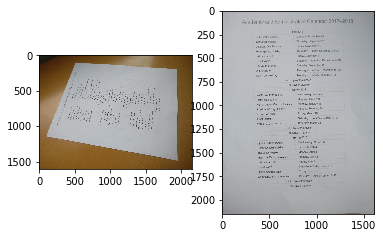

In [31]:
def warp2(source_img, source_points, target_size):
    # Create a target image and select target points to create a homography from target image to source image,
    # in other words map each target point to a source point, and then create a warped version
    # of the image based on the homography by filling in the target image.
    # Make sure the new image (of size target_size) has the same number of color channels as source image
    h=target_size[0]#nrows
    w=target_size[1]#ncols
    target_points_xy=np.asarray([[0,h],[0.0,0.0],[w,0],[w,h]]).T
    target_img=np.zeros(target_size)
    print(source_points)
    H=computeH(to_homog(target_points_xy),to_homog(source_points))
    for pts in target_points_xy.T:
        homogpts=to_homog(pts)
        print("Source Point:",pts)
        outpts=from_homog(np.matmul(H,homogpts))
        print("Corresponding Output point",outpts)

    for xin in range(target_img.shape[1]):
        for yin in range(target_img.shape[0]):
            inpts=to_homog(np.asarray([xin,yin]))
            
            (xout,yout)=from_homog(np.matmul(H,inpts))
            
            
            if xout<1 or xout>=source_img.shape[1]-1 or yout<1 or yout>=source_img.shape[0]-1:
                continue
            
            j,i=xout,yout
            fraci=i%1.0
            fracj=j%1.0
            intensity=(1-fraci)*(1-fracj)*source_img[int(np.floor(i))][int(np.floor(j))]+\
                        (fraci)*(1-fracj)*source_img[int(np.ceil(i))][int(np.floor(j))]+\
                        (fraci)*(fracj)*source_img[int(np.ceil(i))][int(np.ceil(j))]+\
                        (1-fraci)*(fracj)*source_img[int(np.floor(i))][int(np.ceil(j))]
                        
            target_img[yin,xin]=intensity
    return target_img
    #Your code goes here

# Use the code below to plot your result

print(source_points)
result = warp2(source_image, source_points, (source_image.shape[1],source_image.shape[0],3)) #Choose appropriate size
plt.subplot(1, 2, 1)
plt.imshow(source_image)
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.imsave("warp21.png",result)
plt.show()

XIN [[1946 1499    1]
 [ 105 1159    1]
 [ 511  125    1]
 [1944  217    1]]
XINMAT [[1946  105  511]
 [1499 1159  125]
 [   1    1    1]]
LAMBDAS1 [ 0.74404815 -0.89973129  1.15568314]
H1inv [[ 1.44791770e+03 -9.44717858e+01  5.90554087e+02]
 [ 1.11532818e+03 -1.04278857e+03  1.44460393e+02]
 [ 7.44048150e-01 -8.99731294e-01  1.15568314e+00]]
XOUT [[  0 200   1]
 [  0   0   1]
 [200   0   1]
 [200 200   1]]
XOUTMAT [[  0   0 200]
 [200   0   0]
 [  1   1   1]]
LAMBDAS2 [ 1. -1.  1.]
H2inv [[  0.  -0. 200.]
 [200.  -0.   0.]
 [  1.  -1.   1.]]
***********
(200, 200, 3)


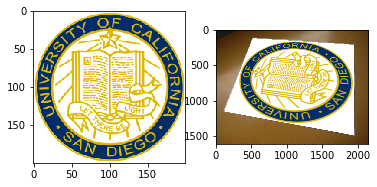

In [33]:
# Load the given UCSD logo image

def warp3(target_image, target_points, source_image):
    #Your code goes here
    h=source_image.shape[0]#nrows
    w=source_image.shape[1]#ncols
    source_points_xy=np.asarray([[0,h],[0,0],[w,0],[w,h]]).T
    H=computeH(to_homog(target_points),to_homog(source_points_xy))
    print(source_image.shape)
    for yin in range(target_image.shape[0]):
        for xin in range(target_image.shape[1]):
            new_point=to_homog(np.asarray([xin,yin]))
            (xout,yout)=from_homog(np.matmul(H,new_point))
            
            if xout>=1 and xout<source_image.shape[1]-1 and yout>=1 and yout<source_image.shape[0]-1:
                i,j=yout,xout
                fraci=i%1.0
                fracj=j%1.0
                intensity=(1-fraci)*(1-fracj)*source_image[int(np.floor(i))][int(np.floor(j))]+\
                            (fraci)*(1-fracj)*source_image[int(np.ceil(i))][int(np.floor(j))]+\
                            (fraci)*(fracj)*source_image[int(np.ceil(i))][int(np.ceil(j))]+\
                            (1-fraci)*(fracj)*source_image[int(np.floor(i))][int(np.ceil(j))]
#                 print(intensity)
                target_image[yin,xin]=intensity
                
    return target_image


# Use the code below to plot your result
target_points=source_points
target_image=source_image
source_image2=logo_image

result1 = warp3(target_image, target_points, source_image2)
plt.subplot(1, 2, 1)
plt.imshow(source_image2)
plt.subplot(1, 2, 2)
plt.imshow(result1)
plt.imsave("warp3.png",result1)
plt.show()